# HERRAMIENTAS MATEMÁTICAS ÚTILES EN FINANZAS CUANTITATIVAS-DATA SCIENCE- MACHINE LEARNING-AI

Desde la llegada de los "Rocket-Scientists" a Wall Street en los 80´s y 90´s las finanzas han evolucionado como una disciplina de las matemáticas aplicadas. Aquí se presentan algunos conceptos útiles en el campo de las finanzas.

# 1 | Aproximación

In [2]:
# Comenzamos importando las librerías necesarias:
import seaborn as sns
import numpy as np
from pylab import plt, mpl

In [3]:
sns.set_style('whitegrid')
plt.style.use('default')
mpl.rcParams['font.family']='serif'
%matplotlib inline

Usaremos la función compuesta por un término trigonométrico y un término lineal: \Sin(x) + 0.5x


In [4]:
def f(x):
    return np.sin(x) + 0.5*x


El objetivo principal es la aproximación a esta función sobre un intervalo dado mediante las técnicas *Regresión* e *Interpolación.* Primero graficaremos la función para tener una idea de como deberán lucir las aproximaciones o mejor dicho, a que se deben acercar, nuestro intervalo de interés sera [-2\pi, 2\pi]

In [28]:
import matplotlib.pyplot as plt

def create_plot(x, y, styles, labels, axlabels, title=""):
    plt.figure(figsize=(10, 6))

    for i in range(len(x)):
        plt.plot(x[i], y[i], styles[i], label=labels[i])

    plt.xlabel(axlabels[0])
    plt.ylabel(axlabels[1])
    plt.title(title, fontsize=14)
    plt.grid(True, which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)
    plt.legend()
    plt.show()


In [29]:
x=np.linspace(-2*np.pi, 2*np.pi, 50)


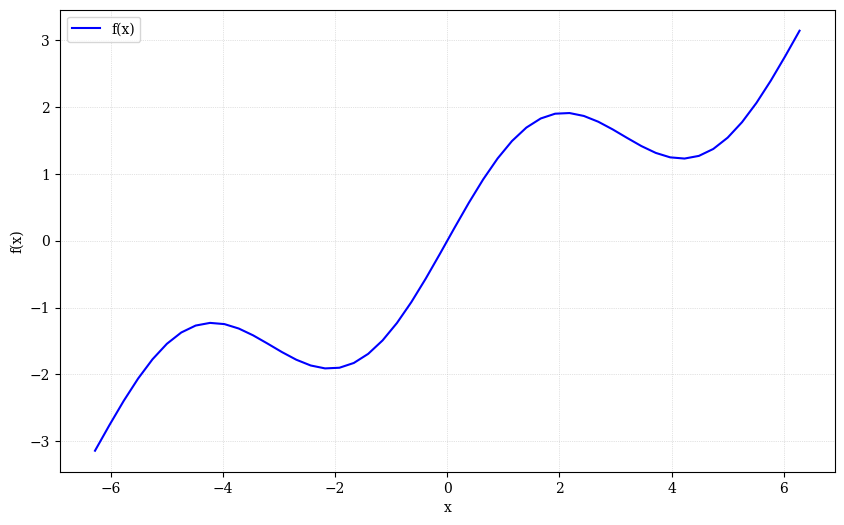

In [30]:
create_plot([x], [f(x)], ['b'], ['f(x)'], ['x', 'f(x)'])

# Regresión

## Regresión para Aproximación de Funciones

La **regresión** es una herramienta bastante eficiente cuando se trata de la **aproximación de funciones**. No solo es adecuada para aproximar funciones unidimensionales, sino que también funciona bien en **dimensiones superiores**. Las técnicas numéricas necesarias para obtener resultados de regresión son **fáciles de implementar y se ejecutan rápidamente**.

Básicamente, la tarea de la regresión, dado un conjunto de funciones base llamadas $b_d$, donde $ d \in \{1, \dots, D\} $, consiste en encontrar los **parámetros óptimos**  $\alpha_1^*, \dots, \alpha_D^* $ de acuerdo con la Ecuación (abajo), donde $ y_i \equiv f(x_i) $ para $ i \in \{1, \dots, I\} $, que son los puntos de observación. -->

Los $ x_i $ se consideran **observaciones independientes**, y los $ y_i $, **observaciones dependientes** (en un sentido funcional o estadístico).

### Ecuación . Problema de minimización de la regresión
$$
\
\min_{\alpha_1, \dots, \alpha_D} \; \frac{1}{I} \sum_{i=1}^I \left( y_i - \sum_{d=1}^D \alpha_d \cdot b_d(x_i) \right)^2
\
$$
---

### Monomios como Funciones Base

Uno de los casos más simples es tomar **monomios** como funciones base, es decir:
$$
\
b_1(x) = 1, \quad b_2(x) = x, \quad b_3(x) = x^2, \quad b_4(x) = x^3, \dots
\
$$
En este caso, `NumPy` tiene funciones integradas tanto para determinar los parámetros óptimos (`np.polyfit()`) como para **evaluar la aproximación** dada una serie de valores de entrada (`np.polyval()`).


In [31]:
res= np.polyfit(x, f(x), deg=1, full=True)
res

(array([ 4.28841952e-01, -5.88784672e-17]),
 array([21.03238686]),
 np.int32(2),
 array([1., 1.]),
 np.float64(1.1102230246251565e-14))

In [32]:
ry=np.polyval(res[0], x)

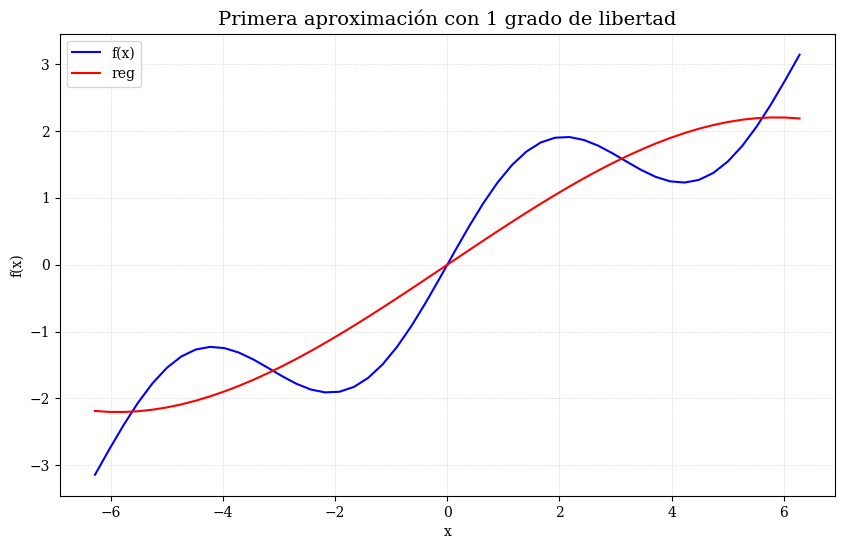

In [45]:
create_plot([x, x], [f(x), ry], ['b', 'r'], ['f(x)', 'reg'], ['x', 'f(x)'],"Primera aproximación con 1 grado de libertad")

Al observar nos damos cuenta que es necesario incrementar el nivel de nomomios para intentar hacer "fit" con la gráfica del Seno, entonces usaremos *deg=5* a modo de ejemplo:

In [34]:
reg= np.polyfit(x, f(x), deg=5, full=True)
ry=np.polyval(reg[0], x)

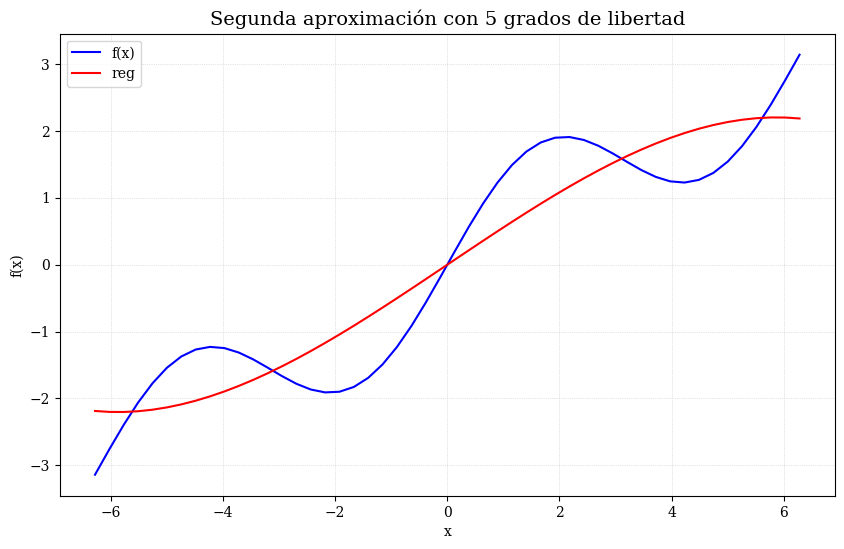

In [46]:
create_plot([x, x], [f(x), ry], ['b', 'r'], ['f(x)', 'reg'], ['x', 'f(x)'],"Segunda aproximación con 5 grados de libertad")

Nuestyro último intento será con *deg=7* y veamos que sucede:

In [36]:
reg = np.polyfit(x, f(x), 7)
ry = np.polyval(reg, x)

In [37]:
np.allclose(f(x), ry)

False

In [38]:
#Mean Squared Error (MSE)
np.mean((f(x) - ry)**2)

np.float64(0.0017769134759517628)

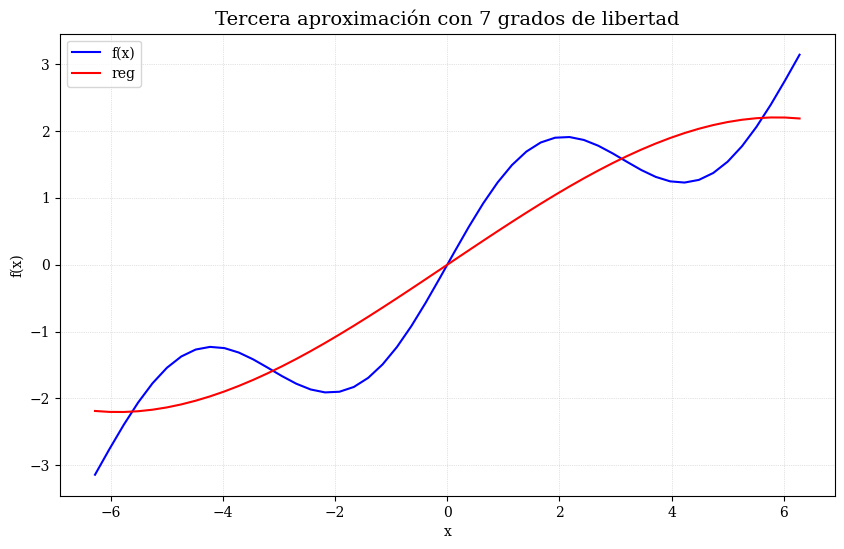

In [47]:
create_plot([x, x], [f(x), ry], ['b', 'r'], ['f(x)', 'reg'], ['x', 'f(x)'],"Tercera aproximación con 7 grados de libertad")

Como podemos observar hemos hecho una aproximación bastante buena a la función objetivo.

En general opdemos obtener mejores aproximaciones al elegir mejores conjuntos de funciones basis,veamos un ejemplo con matrices:
Usaremos como función central np.linalg.lstsq():

In [40]:
matrix = np.zeros((3 + 1, len(x)))
matrix[3, :] = x ** 3
matrix[2, :] = x ** 2
matrix[1, :] = x
matrix[0, :] = 1

In [41]:
reg = np.linalg.lstsq(matrix.T, f(x), rcond=None)[0]

In [42]:
reg.round(4)

array([ 0.    ,  0.5628, -0.    , -0.0054])

In [43]:
ry = np.dot(reg, matrix)

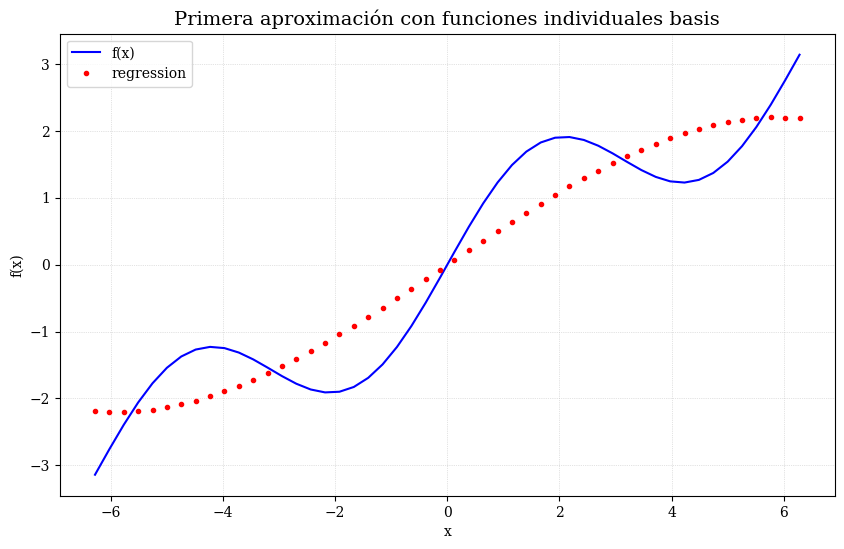

In [48]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],
 ['f(x)', 'regression'], ['x', 'f(x)'],"Primera aproximación con funciones individuales basis")

El resultado no es tan bueno como uno podría esperar de inicio, usando nuetro conocimiento de la primer función:

In [49]:
matrix[3,:]= np.sin(x)

In [50]:
reg=np.linalg.lstsq(matrix.T, f(x), rcond=None)[0]


In [51]:
reg.round(4)


array([0. , 0.5, 0. , 1. ])

In [52]:
ry=np.dot(reg,matrix)


In [53]:
np.allclose(f(x),ry)

True

In [54]:
np.mean((f(x)-ry)**2)

np.float64(3.806562016482484e-31)

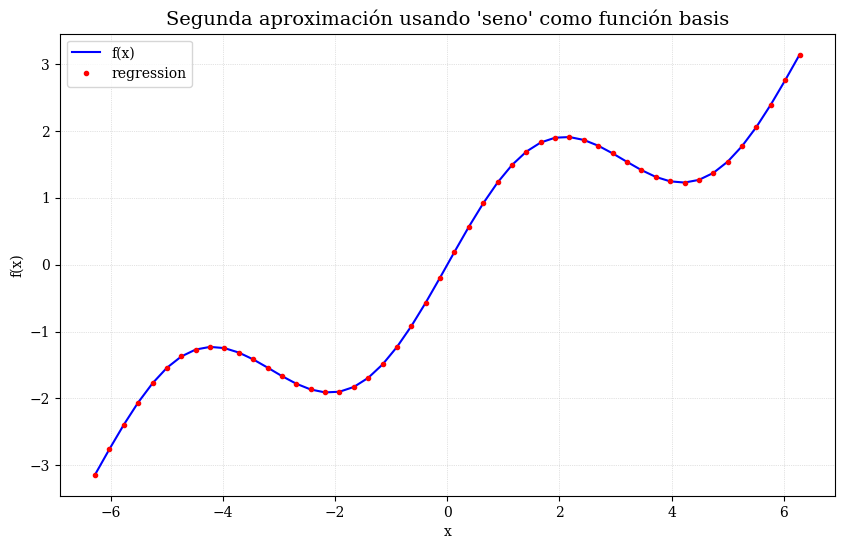

In [56]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],
 ['f(x)', 'regression'], ['x', 'f(x)'],"Segunda aproximación usando 'seno' como función basis")

## Datos con Ruido

La regresión también puede manejar adecuadamente los **datos con ruido**, ya sea que provengan de simulaciones o de mediciones (no perfectas).

Para ilustrar este punto, se generan observaciones independientes con ruido y observaciones dependientes con ruido.

La Figura muestra que los resultados de la regresión están **más cerca de la función original que los propios puntos de datos ruidosos**


In [57]:
xn = np.linspace(-2 * np.pi, 2 * np.pi, 50)
xn = xn + 0.15 * np.random.standard_normal(len(xn))
yn = f(xn) + 0.25 * np.random.standard_normal(len(xn))

In [59]:
reg = np.polyfit(xn, yn, 7)
ry = np.polyval(reg, xn)

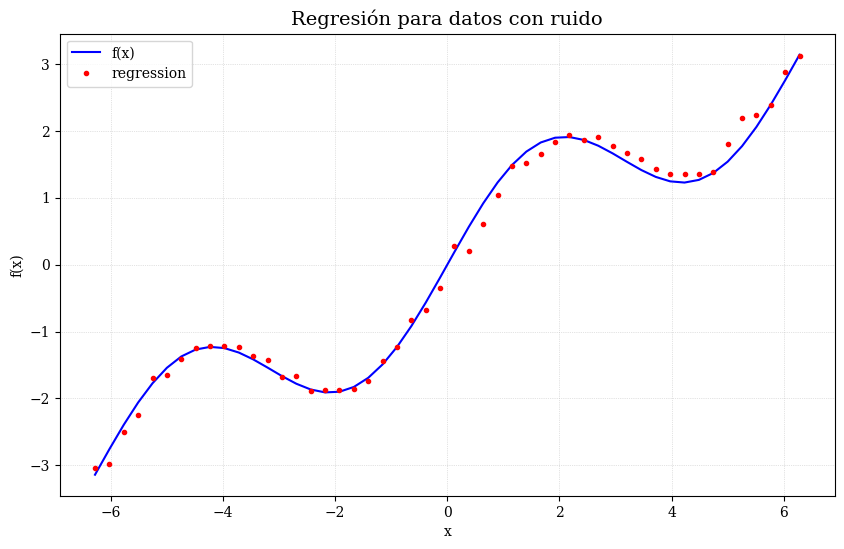

In [60]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],
 ['f(x)', 'regression'], ['x', 'f(x)'],"Regresión para datos con ruido")

## Datos No Ordenados

Otro aspecto importante de la regresión es que el método también funciona sin problemas con **datos no ordenados**.

Los ejemplos anteriores se basaban en datos de $ x $ ordenados, pero **esto no es un requisito**.

Para demostrarlo, veamos otro enfoque que consiste en **aleatorizar los valores de $ x $**.

En este caso, **es difícil identificar alguna estructura** con solo inspeccionar visualmente los datos sin procesar.


In [61]:
xu = np.random.rand(50) * 4 * np.pi - 2 * np.pi
yu = f(xu)

In [63]:
print(xu[:10].round(2))
print(yu[:10].round(2))


[ 2.13  1.04  4.59 -0.78 -4.9  -2.59  0.07 -2.5  -0.49  0.58]
[ 1.91  1.38  1.3  -1.09 -1.47 -1.82  0.1  -1.85 -0.72  0.84]


In [64]:
reg = np.polyfit(xu, yu, 5)
ry = np.polyval(reg, xu)

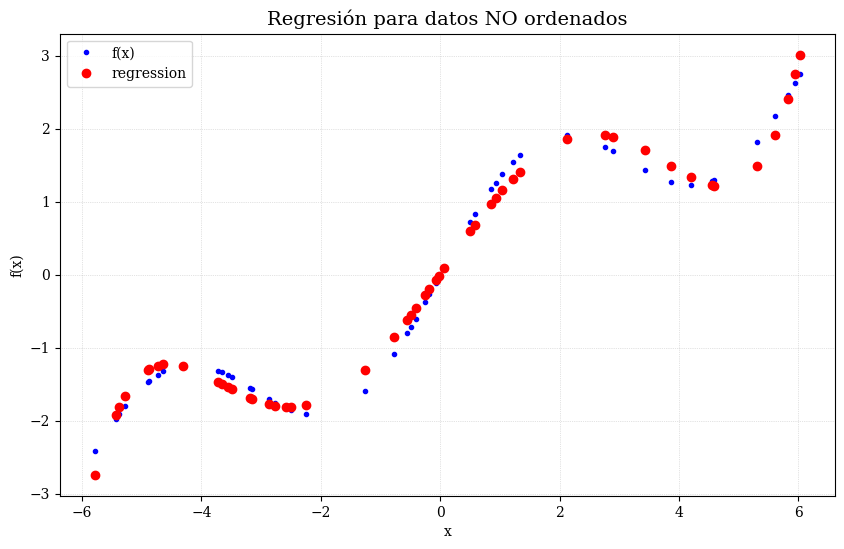

In [66]:
create_plot([xu, xu], [yu, ry], ['b.', 'ro'],
        ['f(x)', 'regression'], ['x', 'f(x)'],"Regresión para datos NO ordenados")

## Múltiples Dimensiones

Otra característica conveniente del enfoque de regresión por mínimos cuadrados es que **puede extenderse a múltiples dimensiones sin demasiadas modificaciones**.

Como ejemplo de función, consideremos $f_m()$, presentada a continuación:


In [67]:
def fm(p):
 x, y = p
 return np.sin(x) + 0.25 * x + np.sqrt(y) + 0.05 * y ** 2

Para visualizar correctamente esta función, se necesitan **rejillas (grids) bidimensionales** de puntos de datos independientes.

A partir de estas rejillas bidimensionales de datos independientes y sus correspondientes datos dependientes, representados en lo siguiente por **X**, **Y** y **Z**, la Figura  muestra la forma de la función $ f_m()$:


In [68]:
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x, y)

In [69]:
Z = fm((X, Y))
x = X.flatten()
y = Y.flatten()

In [70]:
from mpl_toolkits.mplot3d import Axes3D

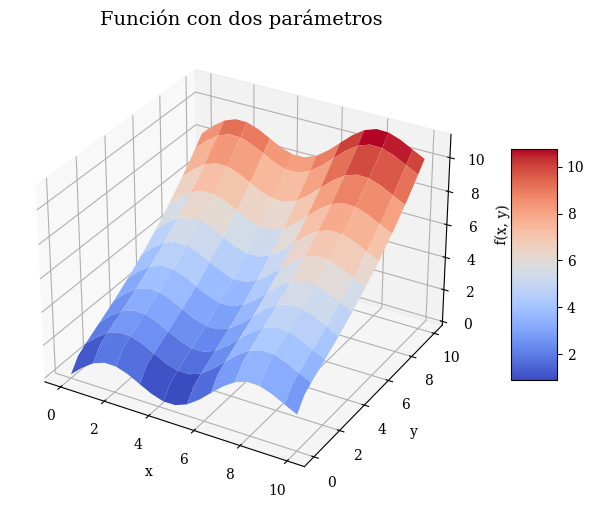

In [74]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
                       cmap='coolwarm', linewidth=0.5,
                       antialiased=True)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

# Título de la gráfica
ax.set_title('Función con dos parámetros', fontsize=14)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


Para obtener buenos resultados de regresión, **el conjunto de funciones base es esencial**.

Por lo tanto, al incorporar conocimiento sobre la propia función $ f_m()$, se incluyen tanto una función `np.sin()` como una `np.sqrt()`.

La Figura 11-10 muestra visualmente los resultados **perfectos** de la regresión:


In [75]:
matrix = np.zeros((len(x), 6 + 1))
matrix[:, 6] = np.sqrt(y)
matrix[:, 5] = np.sin(x)
matrix[:, 4] = y ** 2
matrix[:, 3] = x ** 2
matrix[:, 2] = y
matrix[:, 1] = x
matrix[:, 0] = 1

In [76]:
reg = np.linalg.lstsq(matrix, fm((x, y)), rcond=None)[0]

In [77]:
RZ = np.dot(matrix, reg).reshape((20, 20))

<ipython-input-80-7e66704b86e2>:13: UserWarning: Adding colorbar to a different Figure <Figure size 1000x600 with 4 Axes> than <Figure size 1000x600 with 1 Axes> which fig.colorbar is called on.
  fig.colorbar(surf, shrink=0.5, aspect=5)


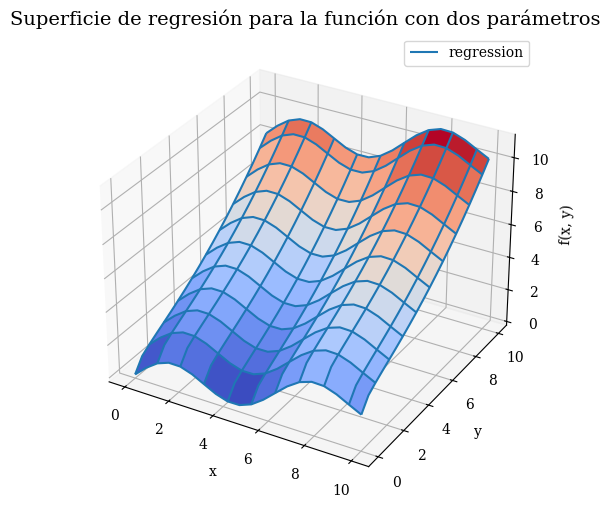

In [80]:
fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(111, projection='3d')
surf1 = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
cmap=mpl.cm.coolwarm, linewidth=0.5,
antialiased=True)
surf2 = ax.plot_wireframe(X, Y, RZ, rstride=2, cstride=2,label='regression')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
ax.set_title('Superficie de regresión para la función con dos parámetros', fontsize=14)
fig.colorbar(surf, shrink=0.5, aspect=5)

Los enfoques de regresión por mínimos cuadrados tienen **múltiples áreas de aplicación**, incluyendo la **aproximación de funciones simples** y la **aproximación de funciones basadas en datos ruidosos o no ordenados**.

Estos enfoques pueden aplicarse tanto a **problemas unidimensionales como multidimensionales**.

Gracias a las matemáticas subyacentes, su aplicación es **“casi siempre la misma”**.


# 2 | INTERPOLACIÓN

En comparación con la regresión, la **interpolación** (por ejemplo, con splines cúbicos) es **más compleja desde el punto de vista matemático**.

Además, está limitada a problemas de **baja dimensionalidad**.

Dado un conjunto ordenado de puntos de observación (ordenados en la dimensión $x$), la idea básica es realizar una interpolación entre dos puntos de datos vecinos de tal forma que:

- No solo los puntos de datos sean perfectamente igualados por la función de interpolación definida por tramos,
- Sino que además la función sea **continuamente diferenciable** en esos puntos.

La diferenciabilidad continua requiere al menos interpolación de **grado 3**, es decir, con **splines cúbicos**.

Sin embargo, el enfoque también puede aplicarse en general con **splines cuadráticos** e incluso **lineales**.


In [81]:
import scipy.interpolate as spi

In [82]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 25)

In [83]:
def f(x):
 return np.sin(x) + 0.5 * x

In [84]:
ipo = spi.splrep(x, f(x), k=1)

In [85]:
iy = spi.splev(x, ipo)

In [86]:
np.allclose(f(x), iy)

True

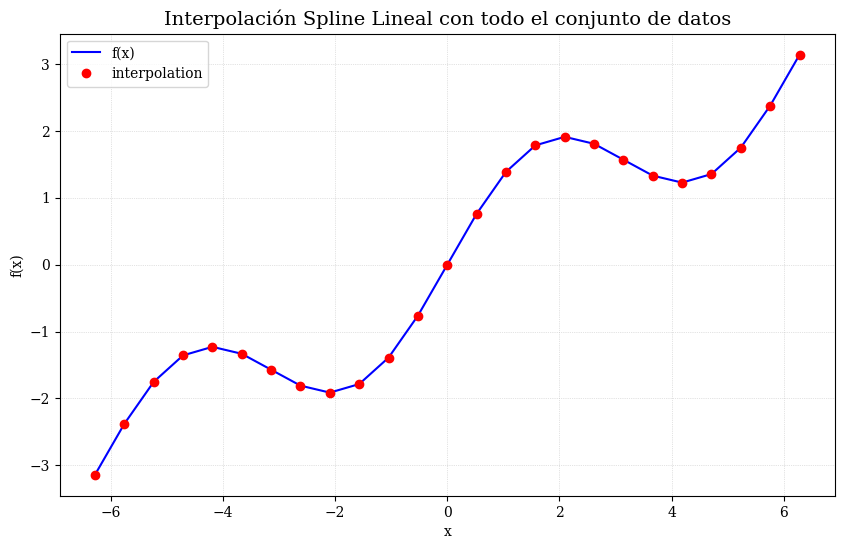

In [88]:
create_plot([x, x], [f(x), iy], ['b', 'ro'],
 ['f(x)', 'interpolation'], ['x', 'f(x)'],"Interpolación Spline Lineal con todo el conjunto de datos")

La **interpolación spline** se utiliza con frecuencia en **finanzas** para generar estimaciones de valores dependientes correspondientes a puntos de datos independientes que **no están incluidos en las observaciones originales**.

Con este propósito, el siguiente ejemplo toma un intervalo mucho más pequeño y analiza más de cerca los valores interpolados utilizando **splines lineales**.

La Figura  muestra que la función de interpolación, en efecto, **interpola linealmente** entre dos puntos de observación.

Para ciertas aplicaciones, esto podría no ser lo suficientemente preciso.

Además, es evidente que la función **no es continuamente diferenciable** en los puntos de datos originales, lo cual representa **otra desventaja**.


In [89]:
xd = np.linspace(1.0, 3.0, 50)
iyd = spi.splev(xd, ipo)

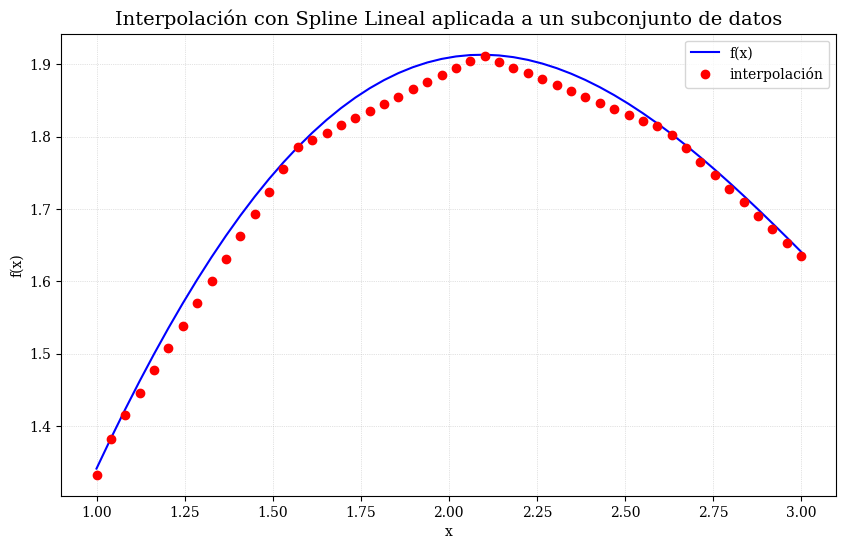

In [92]:
create_plot([xd, xd], [f(xd), iyd], ['b', 'ro'],
 ['f(x)', 'interpolación'], ['x', 'f(x)'],"Interpolación con Spline Lineal aplicada a un subconjunto de datos")

Una repetición del ejercicio usando *Splines Cúbicos* incremente considerablemente la eficiencia.

In [93]:
ipo = spi.splrep(x, f(x), k=3)
iyd = spi.splev(xd, ipo)

In [94]:
np.allclose(f(xd), iyd)

False

In [95]:
np.mean((f(xd) - iyd) ** 2)

np.float64(1.1349319851436252e-08)

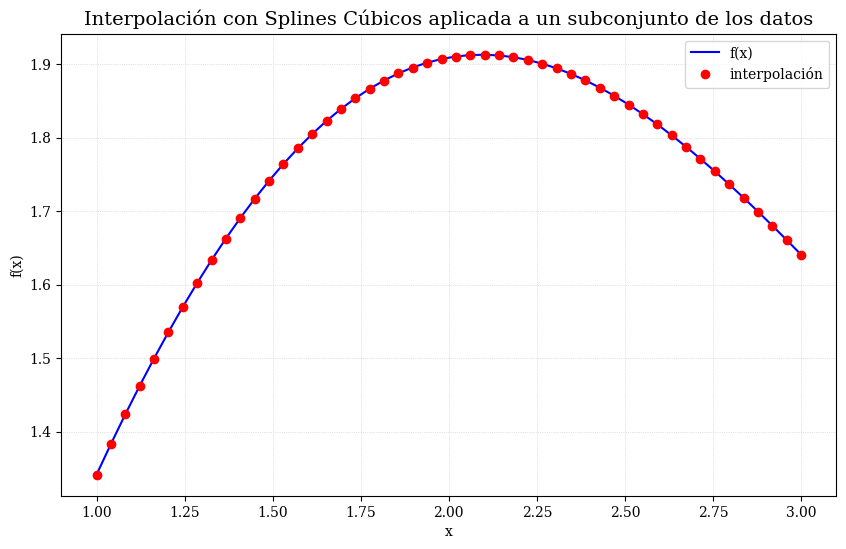

In [97]:
create_plot([xd, xd], [f(xd), iyd], ['b', 'ro'],
 ['f(x)', 'interpolación'], ['x', 'f(x)'],"Interpolación con Splines Cúbicos aplicada a un subconjunto de los datos")

En aquellos casos donde se puede aplicar la **interpolación spline**, se pueden esperar **mejores resultados de aproximación** en comparación con el enfoque de **regresión por mínimos cuadrados**.

Sin embargo, es importante recordar que se requiere **datos ordenados (y sin ruido)**, y que este enfoque está limitado a **problemas de baja dimensionalidad**.

Además, es **computacionalmente más exigente**, por lo que puede tardar **(mucho) más tiempo** que la regresión en ciertos casos de uso.


# 3 | Optimización Convexa

## Optimización Convexa

En **finanzas** y **economía**, la **optimización convexa** desempeña un papel importante.

Algunos ejemplos son:

- La **calibración de modelos de valuación de opciones** con datos del mercado.
- La **optimización de la función de utilidad** de un agente.

Como ejemplo, consideremos la función $ f_m() $:


In [98]:
def fm(p):
 x, y = p
 return (np.sin(x) + 0.05 * x ** 2
 + np.sin(y) + 0.05 * y ** 2)

La Figura muestra la función gráficamente para los intervalos definidos de $x $ y $ y $.

Una inspección visual revela que esta función tiene **múltiples mínimos locales**.

La existencia de un **mínimo global** no puede confirmarse realmente con esta representación gráfica en particular, pero **parece que existe**.


In [99]:
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = fm((X, Y))

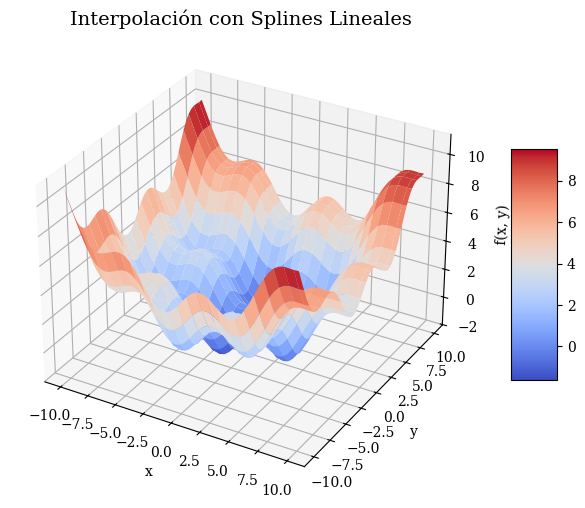

In [102]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
    cmap='coolwarm', linewidth=0.5,
    antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Interpolación con Splines Lineales', fontsize=14)
fig.colorbar(surf, shrink=0.5, aspect=5)

## Optimización Global

A continuación, se implementan tanto un enfoque de **minimización global** como uno **local**.

Las funciones `sco.brute()` y `sco.fmin()` que se aplican provienen del módulo `scipy.optimize`.

Para observar más de cerca lo que ocurre durante los procedimientos de minimización, el siguiente código **modifica la función original** para incluir una opción que permita mostrar los **valores actuales de los parámetros** así como el **valor de la función**.

Esto nos permite **hacer un seguimiento de toda la información relevante** durante el proceso.


In [103]:
import scipy.optimize as sco

In [104]:
def fo(p):
 x, y = p
 z = np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2
 if output == True:
    print('%8.4f | %8.4f | %8.4f' % (x, y, z))
 return z

In [105]:
output = True
sco.brute(fo, ((-10, 10.1, 5), (-10, 10.1, 5)), finish=None)

-10.0000 | -10.0000 |  11.0880
-10.0000 |  -5.0000 |   7.7529
-10.0000 |   0.0000 |   5.5440
-10.0000 |   5.0000 |   5.8351
-10.0000 |  10.0000 |  10.0000
 -5.0000 | -10.0000 |   7.7529
 -5.0000 |  -5.0000 |   4.4178
 -5.0000 |   0.0000 |   2.2089
 -5.0000 |   5.0000 |   2.5000
 -5.0000 |  10.0000 |   6.6649
  0.0000 | -10.0000 |   5.5440
  0.0000 |  -5.0000 |   2.2089
  0.0000 |   0.0000 |   0.0000
  0.0000 |   5.0000 |   0.2911
  0.0000 |  10.0000 |   4.4560
  5.0000 | -10.0000 |   5.8351
  5.0000 |  -5.0000 |   2.5000
  5.0000 |   0.0000 |   0.2911
  5.0000 |   5.0000 |   0.5822
  5.0000 |  10.0000 |   4.7471
 10.0000 | -10.0000 |  10.0000
 10.0000 |  -5.0000 |   6.6649
 10.0000 |   0.0000 |   4.4560
 10.0000 |   5.0000 |   4.7471
 10.0000 |  10.0000 |   8.9120


array([0., 0.])

Los valores óptimos de los parámetros, dada la parametrización inicial de la función, son $ x = y = 0 $.

El valor resultante de la función también es 0, como se puede verificar rápidamente en la salida anterior.

Uno podría inclinarse a aceptar esto como el **mínimo global**.

Sin embargo, la **parametrización inicial** utilizada aquí es bastante tosca, ya que se emplean **tamaños de paso de 5** para ambos parámetros de entrada.

Esto, por supuesto, puede **refinarse considerablemente**, lo que conduciría a **mejores resultados en este caso**, y demostraría que la **solución anterior no era la óptima**


In [106]:
output = False
opt1 = sco.brute(fo, ((-10, 10.1, 0.1), (-10, 10.1, 0.1)), finish=None)

In [108]:
opt1


array([-1.4, -1.4])

In [109]:
fm(opt1)

np.float64(-1.7748994599769203)

Ahora los valores óptimos son $x=y=-1.4$ y el mínimo de la minimizacipon global es $-1.7749$

## Optimización Local

La **optimización convexa local** que se presenta a continuación se basa en los resultados de la **optimización global**.

La función `sco.fmin()` recibe como entrada la **función a minimizar** y los **valores iniciales de los parámetros**.

Opcionalmente, se pueden especificar parámetros como la **tolerancia en los valores de entrada**, la **tolerancia en el valor de la función**, así como el **número máximo de iteraciones** y **llamadas a la función**.

La optimización local permite **mejorar aún más el resultado**.


In [110]:
output = True
opt2 = sco.fmin(fo, opt1, xtol=0.001, ftol=0.001,
 maxiter=15, maxfun=20)

 -1.4000 |  -1.4000 |  -1.7749
 -1.4700 |  -1.4000 |  -1.7743
 -1.4000 |  -1.4700 |  -1.7743
 -1.3300 |  -1.4700 |  -1.7696
 -1.4350 |  -1.4175 |  -1.7756
 -1.4350 |  -1.3475 |  -1.7722
 -1.4088 |  -1.4394 |  -1.7755
 -1.4438 |  -1.4569 |  -1.7751
 -1.4328 |  -1.4427 |  -1.7756
 -1.4591 |  -1.4208 |  -1.7752
 -1.4213 |  -1.4347 |  -1.7757
 -1.4235 |  -1.4096 |  -1.7755
 -1.4305 |  -1.4344 |  -1.7757
 -1.4168 |  -1.4516 |  -1.7753
 -1.4305 |  -1.4260 |  -1.7757
 -1.4396 |  -1.4257 |  -1.7756
 -1.4259 |  -1.4325 |  -1.7757
 -1.4259 |  -1.4241 |  -1.7757
 -1.4304 |  -1.4177 |  -1.7757
 -1.4270 |  -1.4288 |  -1.7757


<ipython-input-110-7170fd12dad5>:2: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  opt2 = sco.fmin(fo, opt1, xtol=0.001, ftol=0.001,


In [111]:
opt2

array([-1.42702972, -1.42876755])

In [112]:
fm(opt2)

np.float64(-1.7757246992239009)

Para muchos problemas de **optimización convexa**, es recomendable realizar primero una **minimización global** antes de aplicar la local.

La razón principal es que los **algoritmos de optimización local convexa** pueden quedar fácilmente atrapados en un **mínimo local** (o realizar lo que se conoce como *basin hopping*), ignorando completamente **otros mínimos locales mejores** o incluso el **mínimo global**.

Lo siguiente muestra que, al establecer la parametrización inicial en $ x = y = 2 $, se obtiene, por ejemplo, un valor de "mínimo" **mayor que cero**.


In [113]:
output = False
sco.fmin(fo, (2.0, 2.0), maxiter=250)


Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


array([4.2710728 , 4.27106945])

## Optimización con Restricciones

Hasta ahora, esta sección solo ha considerado problemas de **optimización sin restricciones**.

Sin embargo, **grandes clases de problemas de optimización económicos o financieros** están restringidos por una o varias condiciones.

Dichas restricciones pueden tomar formalmente la forma de **igualdades o desigualdades**.

Como ejemplo sencillo, consideremos el problema de **maximización de utilidad** de un inversionista (que maximiza la utilidad esperada) que puede invertir en dos activos riesgosos.

Ambos activos tienen un precio de $ q_a = q_b = 10 $ USD hoy. Después de un año, tienen un rendimiento de:

- 15 USD y 5 USD, respectivamente, en el **estado $ u $**
- 5 USD y 12 USD, respectivamente, en el **estado $ d $**

Ambos estados son **igual de probables**. Denotamos los vectores de rendimientos de los dos activos por $r_a $ y $ r_b $, respectivamente.

El inversionista tiene un presupuesto de $ w_0 = 100 $ USD para invertir y deriva utilidad de la riqueza futura de acuerdo con la función de utilidad:
$$
\
u(w) = \sqrt{w}
\
$$
donde $ w $ es la riqueza (en USD) disponible.

La **Ecuación +** es una formulación del problema de maximización, donde $a $ y $ b $ representan la cantidad de cada activo comprada por el inversionista.

---

### Ecuación +. Problema de maximización de utilidad esperada (1)
$$
\
\max_{a, b} \; \mathbb{E}[u(w_1)] = p \cdot w_1^u + (1 - p) \cdot w_1^d
\
$$
$$
\
w_1 = a \cdot r_a + b \cdot r_b
\
$$
$$
\
w_0 \geq a \cdot q_a + b \cdot q_b
\
$$
$$
\
a, b \geq 0
\
$$
---

Sustituyendo todos los valores numéricos, obtenemos el problema en la **Ecuación ++**.

Nota: ahora se minimiza la **utilidad esperada negativa**.

---

### Ecuación ++. Problema de maximización de utilidad esperada (2)
$$
\
\min_{a, b} \; - \mathbb{E}[u(w_1)] = - \left( 0.5 \cdot \sqrt{w_1^u} + 0.5 \cdot \sqrt{w_1^d} \right)
\
$$
$$
\
w_1^u = 15a + 5b
\
$$
$$
\
w_1^d = 5a + 12b
\
$$
$$
\
100 \geq 10a + 10b
\
$$
$$
\
a, b \geq 0
\
$$
---

Para resolver este problema, la función `scipy.optimize.minimize()` es adecuada.

Esta función recibe como entrada, además de la función a minimizar:

- Las **restricciones** (en forma de una lista de diccionarios),
- Y los **límites de los parámetros** (como una tupla de tuplas).

El siguiente bloque de código traduce el problema de la **Ecuación ++** a Python.


In [114]:
import math

In [115]:
def Eu(p):
    s, b = p
    return -(0.5 * math.sqrt(s * 15 + b * 5) +
        0.5 * math.sqrt(s * 5 + b * 12))

In [116]:
cons = ({'type': 'ineq',
 'fun': lambda p: 100 - p[0] * 10 - p[1] * 10})

In [117]:
bnds = ((0, 1000), (0, 1000))

In [119]:
resultado = sco.minimize(Eu, [5, 5], method='SLSQP',
    bounds=bnds, constraints=cons)

El objeto  *resultado* contiene **toda la información relevante**.

Con respecto al **valor mínimo de la función**, es importante recordar que se debe **revertir el signo**, ya que se minimizó la utilidad esperada negativa.


In [120]:
resultado

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -9.700883611487832
       x: [ 8.025e+00  1.975e+00]
     nit: 5
     jac: [-4.851e-01 -4.849e-01]
    nfev: 16
    njev: 5

In [121]:
resultado['x']

array([8.02547122, 1.97452878])

In [122]:
-resultado['fun']

9.700883611487832

In [123]:
np.dot(resultado['x'], [10, 10])

np.float64(99.99999999999999)

# 4| Integración Numérica

## Integración Numérica

Especialmente en temas de **valuación y fijación de precios de opciones**, la **integración** es una herramienta matemática importante.

Esto se debe a que los **valores en medida neutral al riesgo** de los derivados pueden expresarse, en general, como la **esperanza descontada** de su pago bajo la **medida neutral al riesgo** o **medida martingala**.

La esperanza, a su vez, es una **suma** en el caso discreto y una **integral** en el caso continuo.

El subpaquete `scipy.integrate` proporciona diferentes funciones para realizar **integración numérica**.

In [124]:
import scipy.integrate as sci


In [125]:
def f(x):
 return np.sin(x) + 0.5 * x

El intervalo de integración será $[0.5,9.5]$ llevándonos a la integral definida:
### *Integral de ejemplo*

$$
\int_{0.5}^{9.5} f(x) \, dx = \int_{0.5}^{9.5} \left( \sin(x) + \frac{x}{2} \right) dx
$$


In [126]:
x = np.linspace(0, 10)
y = f(x)
a = 0.5
b = 9.5
Ix = np.linspace(a, b)
Iy = f(Ix)

In [127]:
from matplotlib.patches import Polygon

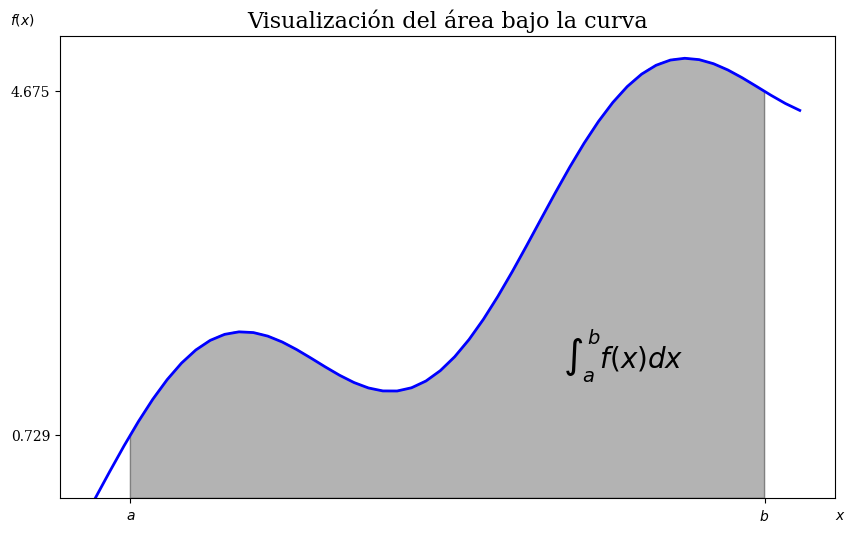

In [130]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Visualización del área bajo la curva", fontsize=16)  # Título añadido

plt.plot(x, y, 'b', linewidth=2)
plt.ylim(bottom=0)

Ix = np.linspace(a, b)
Iy = f(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)

plt.text(0.75 * (a + b), 1.5, r"$\int_a^b f(x)dx$",
         horizontalalignment='center', fontsize=20)

plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([f(a), f(b)])


## Integración Numérica

El subpaquete `scipy.integrate` contiene una selección de funciones para **integrar numéricamente** una función matemática dada, dentro de **límites superior e inferior** de integración.

Algunos ejemplos incluyen:

- `sci.fixed_quad()` para **cuadratura de Gauss fija**,
- `sci.quad()` para **cuadratura adaptativa**,


In [131]:
sci.fixed_quad(f, a, b)[0]

np.float64(24.366995967084602)

In [132]:
sci.quad(f, a, b)[0]

24.374754718086752

## Integración por Simulación

La **valuación de opciones y derivados mediante simulación de Monte Carlo** se basa en la idea de que **una integral puede evaluarse mediante simulación**.

Para ello, se generan $ I $ valores aleatorios de $ x $ entre los límites de integración, y se evalúa la función de integración en cada uno de esos valores aleatorios de $ x $.

Luego, se **suman todos los valores de la función** y se calcula el **promedio**, lo cual da una estimación promedio de la función sobre el intervalo de integración.

Finalmente, se **multiplica este valor promedio por la longitud del intervalo de integración** para obtener una estimación del valor de la integral.

El siguiente código muestra cómo el valor estimado de la integral mediante **Monte Carlo** converge —aunque no de forma monótona— al valor real a medida que **se incrementa el número de muestras aleatorias**.

El estimador resulta ser **bastante preciso incluso con cantidades relativamente pequeñas de muestras aleatorias**.


In [135]:
for i in range(1, 20):
 np.random.seed(1000)
 x = np.random.random(i * 10) * (b - a) + a
 print(np.mean(f(x)) * (b - a))

24.804762279331463
26.522918898332378
26.265547519223976
26.02770339943824
24.99954181440844
23.881810141621663
23.527912274843253
23.507857658961207
23.67236746066989
23.679410416062886
24.424401707879305
24.239005346819056
24.115396924962802
24.424191987566726
23.924933080533783
24.19484212027875
24.117348378249833
24.100690929662274
23.76905109847816


# CONCLUSIONES

Hemos visto **temas y herramientas matemáticas seleccionadas que son importantes en finanzas**.

Por ejemplo, la **aproximación de funciones** es fundamental en muchas áreas financieras, como:

- Modelos basados en factores,
- Interpolación de curvas de rendimiento,
- Y enfoques de valuación de opciones americanas mediante **Monte Carlo basado en regresión**.

Las **técnicas de optimización convexa** también son utilizadas regularmente en finanzas; por ejemplo, al **calibrar modelos paramétricos de valuación de opciones** con precios de mercado o con **volatilidades implícitas**.

La **integración numérica** es central, por ejemplo, en la **valuación de opciones y derivados**.

Una vez que se ha derivado la **medida de probabilidad de riesgo neutral** para uno (o varios) procesos estocásticos, el cálculo del precio de la opción se reduce a tomar la **esperanza del pago de la opción bajo la medida neutral al riesgo** y **descontar este valor al presente**.


